In [1]:
%matplotlib inline
from IPython.core. pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rc('font', family='AppleGothic')

## 1.3 확률분포

* 표본 공간 : 나타날 수 있는 모든 가능한 사건의 집합
* 확률 변수 : 표본공간에서 일정한 확률을 가지고 발생하는 사건에 수치를 일대일 대응시킨 함수
* 확률 분포 함수 : 확률 변수가 가지는 여러 결과에 확률을 나타내는 함수
    * 확률변수가 이산적인 경우 => 이산확률변수 : 특정한 값들의 목록에서 값을 취한다고 가정
    * 확률변수가 연속적인 경우 => 연속확률변수 : 임의적인 값을 가짐
    * 확률변수가 혼합적인 경우 => 혼합확률변수 : 이산확률변수와 연속확률변수 모두에 확률을 부여
   

### 1.3.1 이산적인 경우

확률변수가 이산적이라면 그 분포를 확률질량함수라고 한다.  
확률질량함수는 확률변수가 특정값K를 취할 때 확률, P(Z = k)를 나타낸다.  
확률질량함수는 확률변수를 완벽하게 설명한다. => 질량함수를 안다면 Z가 어떻게 움직일지도 안다.

ex) 확률질량함수의 예 (푸아송 분포)

<center>$P(Z = k) = {\lambda ^{k} e^{-\lambda}\over k!} , k = 0, 1, 2, ...$</center>

$\lambda$는 분포의 모수, 분포 모양을 결정, 양수, 값을 늘리면 큰 값에 더 많은 확률을 부여  
$\lambda$는 푸아송분포의 밀도를 나타냄  

k는 음수가 아닌 정수

<center>$Z \sim Poi(\lambda)$</center>

<center>$E[Z|\lambda] = \lambda$</center>

Text(0.5, 0, '$k$')

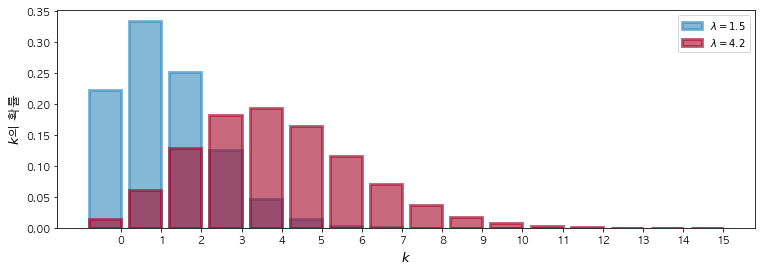

In [2]:
figsize(12.5, 4)

import scipy.stats as stats
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw="3")

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("$k$의 확률", fontsize=13)
plt.xlabel("$k$", fontsize=13)

### 1.3.2 연속적인 경우

확률변수가 연속적이라면 그 분포를 확률밀도함수라고 한다.  

ex) 지수확률변수에 대한 밀도함수

<center>$f_{Z}(z|\lambda) = \lambda e^{-\lambda z}, z \ge 0$</center>

<center>$Z \sim Exp(\lambda)$</center>

<center>$E[Z|\lambda] = {1\over\lambda}$</center>

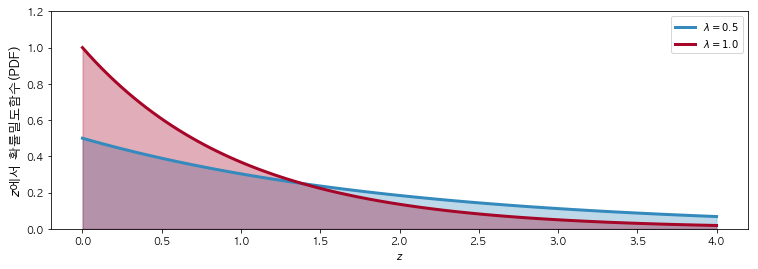

In [3]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1. / l), lw=3,
             color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1. / l), color=c, alpha=.33)

plt.legend()
plt.ylabel("$z$에서 확률밀도함수(PDF)",fontsize=13)
plt.xlabel("$z$")
_ = plt.ylim(0, 1.2)

어느 지점에서 확률밀도함수 값이 그 지점의 확률과 같지 않다  

### 1.3.3 그럼 $\lambda$란 무엇인가?

실제 세계에서 $\lambda$는 숨겨져 있다.  
우리는 오직 Z만 볼 수 있으며 숨겨진 $\lambda$를 찾아내는 것이 목표  
문제는 Z와 $\lambda$가 일대일로 대응되지 않아 찾기 어렵다.

베이지안 추론에서 $\lambda$란 무엇인가에 대한 **믿음**과 관련된다  
$\lambda$는 고정된 값이기 때문에 해당 변수의 값의 믿음의 정도로써 고정된 값에 확률을 부여할 수 있다.